<h2>Latar Belakang</h2>
Dalam industri ritel yang kompetitif, pemahaman yang mendalam tentang perilaku dan preferensi pelanggan menjadi kunci keberhasilan. Supermarket perlu mengenali pola belanja pelanggan untuk meningkatkan loyalitas dan pendapatan. Analisis data pelanggan, termasuk informasi demografis dan perilaku pembelian, memberikan wawasan penting yang dapat digunakan untuk merancang strategi pemasaran dan operasional yang lebih efektif.

<h2>Pernyataan Masalah</h2>
Supermarket menghadapi tantangan dalam memahami perilaku dan preferensi belanja pelanggan yang beragam. Untuk meningkatkan loyalitas dan pendapatan, supermarket perlu menjawab beberapa pertanyaan kunci melalui analisis data pelanggan:

### - Bagaimana distribusi usia pelanggan dan bagaimana pengeluaran mereka berdasarkan kelompok usia?
### - Apa saja pola pengeluaran pelanggan pada berbagai kategori produk utama?
### - Bagaimana segmentasi pelanggan berdasarkan pendapatan dan pengeluaran mereka?
### - Bagaimana frekuensi pembelian pelanggan melalui web dan toko fisik, dan apa implikasinya bagi strategi pemasaran?

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Dataset</h2>

Dataset memuat data customers dari sebuah supermarket yang memiliki 2240 baris dan 29 kolom, setiap baris menggambarkan informasi seorang customer beserta dengan featuresnya. Berikut penjelasan dari setiap kolomnya :

### People
● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise

### Products
● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years

### Promotion
● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise

### Place
● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalog

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to the company’s website in the last month

In [8]:
file_path = 'Documents/Supermarket Customers.csv'
data = pd.read_csv(file_path, sep='\t')

In [9]:
# Menampilkan beberapa baris data untuk inspeksi awal
print("Data Awal:")
display(data.head(), data.tail())

# Menampilkan informasi kolom
print("\nInformasi Kolom:")
print(data.info())

# Deskripsi statistik dasar
print("\nDeskripsi Statistik Awal:")
print(data.describe())

Data Awal:


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]


Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases   

Dari informasi tersebut terdapat beberapa hal yang dapat diperhatikan :
1. Jumlah data yang kita miliki adalah 2240 baris, dan 29 kolom.

2. Terdapat hanya 3 kolom yang tipe datanya object, sedangkan kolom lainnya adalah integer atau float.

3. Tipe data pada kolom "Dt_Customer" adalah object, padahal valuesnya adalah datetime.

4. Terdapat sejumlah missing values pada kolom "Income"

<h2>Data Handling</h2>

In [4]:
# Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)

# Mengisi missing values pada kolom numeric dengan median
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].apply(lambda x: x.fillna(x.median()))

# Verifikasi missing values setelah imputasi
missing_values_after = data.isnull().sum()
print("\nMissing Values setelah Imputasi:")
print(missing_values_after)

# Deskripsi statistik setelah imputasi
print("\nDeskripsi Statistik Setelah Imputasi:")
print(data.describe())


Missing Values:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Missing Values setelah Imputasi:
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Cust

### Menangani Missing Values

Dalam dataset pelanggan supermarket, terdapat beberapa missing values pada kolom-kolom numerik yang perlu ditangani untuk menjaga integritas analisis data. Langkah-langkah berikut telah diambil untuk menangani missing values:

1. **Identifikasi Missing Values:**
   - Pertama, dilakukan identifikasi missing values di setiap kolom untuk mengetahui jumlah dan lokasi nilai yang hilang.
   

2. **Mengisi Missing Values pada Kolom Numerik:**
    - Untuk kolom-kolom numerik, missing values diisi menggunakan median dari kolom tersebut. Median dipilih karena lebih robust terhadap   outliers dibandingkan mean, sehingga memberikan nilai tengah yang lebih representatif.
  
3. **Verifikasi Setelah Imputasi:**
   - Setelah imputasi dilakukan, dilakukan verifikasi untuk memastikan bahwa tidak ada lagi missing values yang tersisa dalam dataset.

In [5]:
#Outliers
# Menggunakan IQR untuk mengidentifikasi outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"\nOutliers pada kolom {column}:")
    print(outliers)
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Identifikasi dan hapus outliers untuk setiap kolom numerik
for column in numeric_columns:
    data = remove_outliers(data, column)

# Deskripsi statistik setelah menghapus outliers
print("\nDeskripsi Statistik Setelah Menghapus Outliers:")
print(data.describe())


Outliers pada kolom ID:
Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

Outliers pada kolom Year_Birth:
        ID  Year_Birth Education Marital_Status   Income  Kidhome  Teenhome  \
192   7829        1900  2n Cycle       Divorced  36640.0        1         0   
239  11004        1893  2n Cycle         Single  60182.0        0         1   
339   1150        1899       PhD       Together  83532.0        0         0   

    Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
192  26-09-2013       99        15  ...                  5             0   
239  17-05-2014       23

#### Menangani Outliers

1. **Identifikasi Outliers:**
   Untuk mengidentifikasi outliers, digunakan metode Interquartile Range (IQR). IQR adalah ukuran statistik yang menggambarkan rentang tengah data dan membantu dalam mengidentifikasi outliers.

2. **Menghapus Outliers:**
   Setelah outliers diidentifikasi, langkah berikutnya adalah menghapus outliers tersebut dari dataset. Ini dilakukan dengan menyaring data yang berada di luar rentang IQR.

3. **Verifikasi Setelah Penghapusan Outliers:**
   Setelah outliers dihapus, dilakukan verifikasi dengan menampilkan deskripsi statistik dari data yang telah dibersihkan untuk memastikan tidak ada lagi outliers yang tersisa.


In [6]:
# Data Duplicate
duplicate_rows = data.duplicated().sum()
print("\nJumlah Data Duplikat:")
print(duplicate_rows)


Jumlah Data Duplikat:
0


**Pada Dataset tidak terdapat data yang duplikat**

In [11]:
# Menyimpan data yang telah diolah
cleaned_file_path = 'Documents/Supermarket Customers Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData telah disimpan ke:", cleaned_file_path)


Data telah disimpan ke: Documents/Supermarket Customers Cleaned.csv



Data telah disimpan ke: Documents/Supermarket Customers Cleaned.csv


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


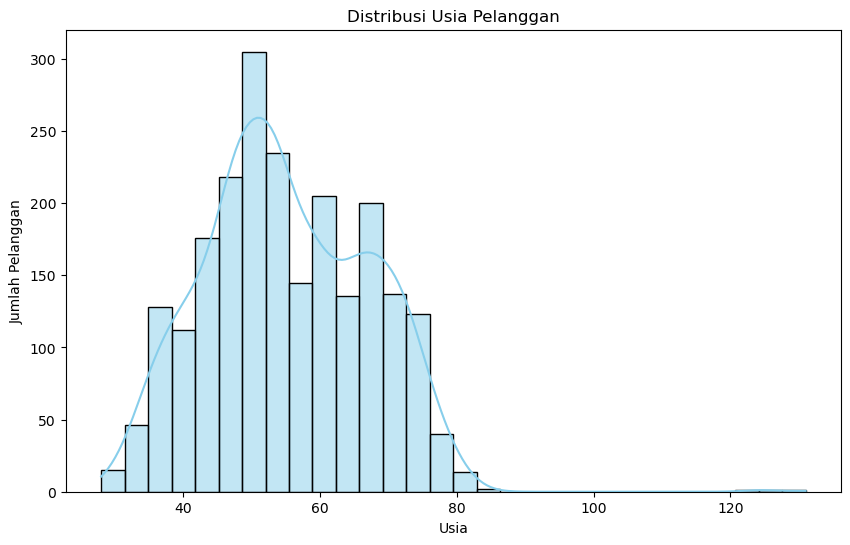

In [13]:
# Menambahkan kolom usia berdasarkan tahun lahir
data['Age'] = 2024 - data['Year_Birth']

# Menyimpan data yang telah diolah
cleaned_file_path = 'Documents/Supermarket Customers Cleaned.csv'
data.to_csv(cleaned_file_path, index=False)

print("\nData telah disimpan ke:", cleaned_file_path)
# Memastikan nilai infinitif diubah menjadi NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot distribusi usia pelanggan
plt.figure(figsize=(10, 6))
sns.histplot(data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribusi Usia Pelanggan')
plt.xlabel('Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()

#### Analisis Distribusi Faktor Demografi

1. **Distribusi Usia Pelanggan:**
   Distribusi usia pelanggan dianalisis menggunakan histogram untuk melihat bagaimana usia pelanggan tersebar dalam dataset. Hal ini membantu dalam mengidentifikasi kelompok usia mana yang mendominasi pelanggan supermarket.

2. **Distribusi Pelanggan Berdasarkan Kelompok Usia:**
   Kelompok usia dibagi menjadi tiga kategori: 'Adult' (18-35 tahun), 'Middle-aged' (36-55 tahun), dan 'Elderly' (56+ tahun). Analisis ini dilakukan dengan membagi usia pelanggan ke dalam kelompok-kelompok ini dan memvisualisasikannya menggunakan plot batang.

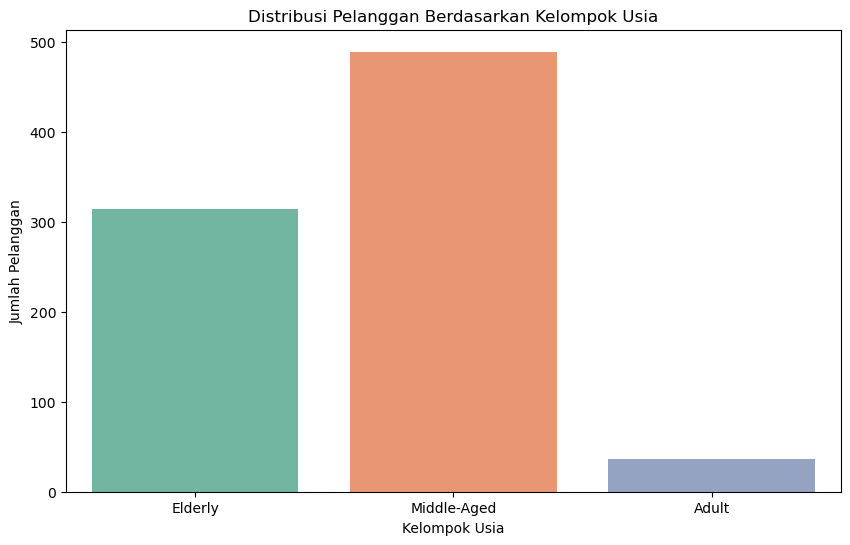

In [9]:
# Membuat kelompok usia
def age_group(age):
    if age < 36:
        return 'Adult'
    elif age < 56:
        return 'Middle-Aged'
    else:
        return 'Elderly'

data['Age_Group'] = data['Age'].apply(age_group)

# Plot distribusi pelanggan berdasarkan kelompok usia
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age_Group', palette='Set2')
plt.title('Distribusi Pelanggan Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Jumlah Pelanggan')
plt.show()

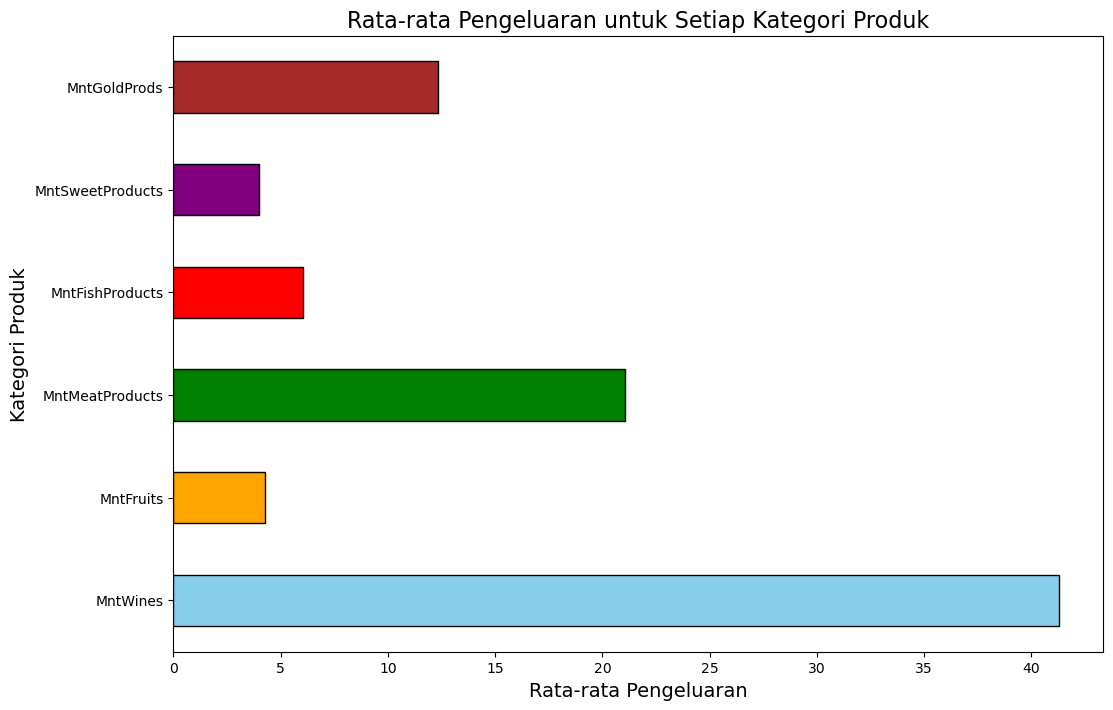

In [10]:
# Menghitung rata-rata pengeluaran untuk setiap kategori produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
avg_spending = data[product_columns].mean()

# Plot rata-rata pengeluaran dengan warna berbeda dan legenda
plt.figure(figsize=(12, 8))
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown']
avg_spending.plot(kind='barh', color=colors, edgecolor='black')

# Menambahkan judul dan label sumbu
plt.title('Rata-rata Pengeluaran untuk Setiap Kategori Produk', fontsize=16)
plt.xlabel('Rata-rata Pengeluaran', fontsize=14)
plt.ylabel('Kategori Produk', fontsize=14)

plt.show()

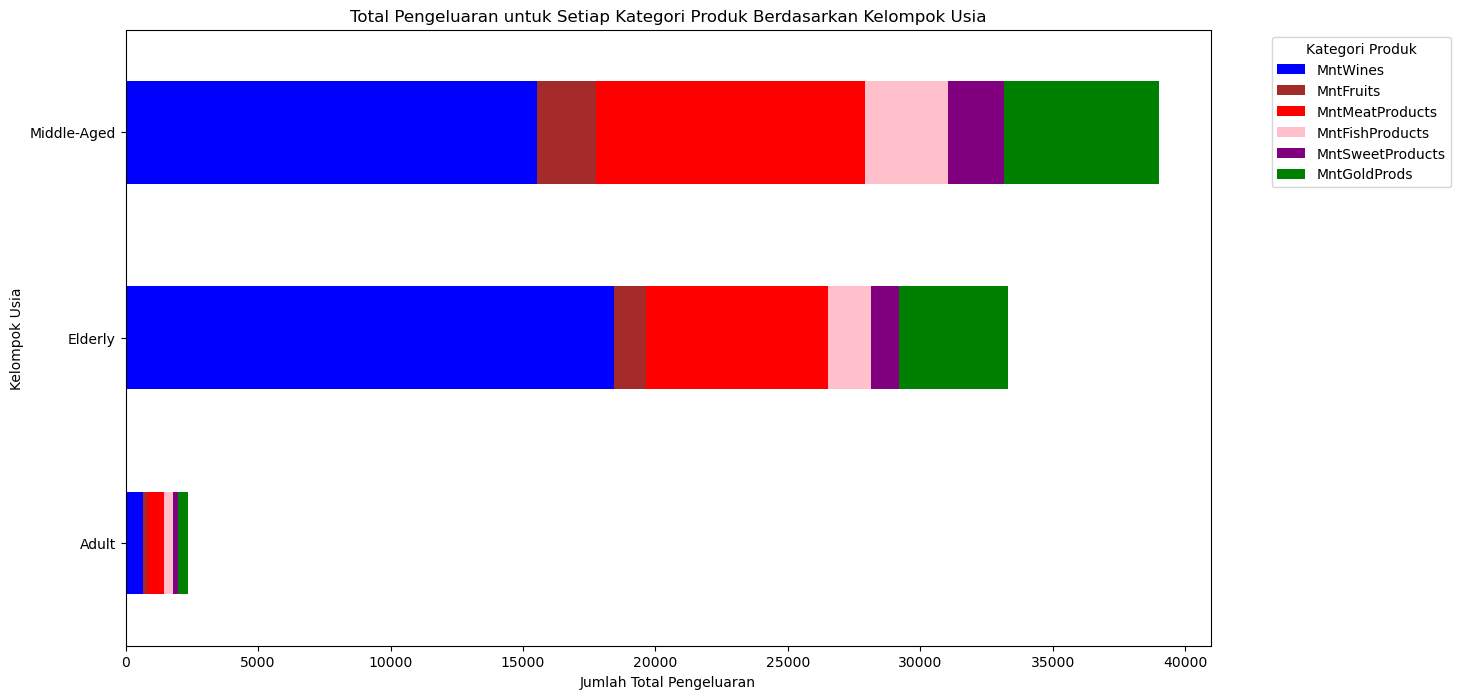

In [11]:
# Menghitung total pengeluaran untuk setiap kategori produk dalam setiap kelompok usia
total_spent_by_age_group = data.groupby('Age_Group', observed=False)[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Plot total pengeluaran
total_spent_by_age_group.plot(kind='barh', stacked=True, figsize=(14, 8), color=['blue', 'brown', 'red', 'pink', 'purple', 'green'])
plt.title('Total Pengeluaran untuk Setiap Kategori Produk Berdasarkan Kelompok Usia')
plt.xlabel('Jumlah Total Pengeluaran')
plt.ylabel('Kelompok Usia')
plt.legend(title='Kategori Produk', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

3. **Rata-rata Pengeluaran untuk Setiap Kategori Produk:**
   Analisis ini menghitung rata-rata pengeluaran pelanggan untuk setiap kategori produk utama seperti wine, buah-buahan, daging, ikan, manisan, dan produk emas. Visualisasi menggunakan plot batang horizontal dengan warna berbeda untuk setiap kategori produk membantu dalam mengidentifikasi produk mana yang memiliki rata-rata pengeluaran tertinggi.

4. **Total Pengeluaran untuk Setiap Kategori Produk Berdasarkan Kelompok Usia:**
   Analisis ini menghitung total pengeluaran untuk setiap kategori produk berdasarkan kelompok usia. Visualisasi dilakukan menggunakan plot batang horizontal yang ditumpuk untuk menunjukkan kontribusi setiap kelompok usia terhadap total pengeluaran pada setiap kategori produk.

### Analisis Segmentasi Berdasarkan Perilaku Pembelian

Untuk memahami perilaku pembelian pelanggan dengan lebih baik, dilakukan segmentasi menggunakan metode K-Means clustering. Analisis ini membantu dalam mengidentifikasi pola pengeluaran dan frekuensi pembelian, yang dapat digunakan untuk merancang strategi pemasaran yang lebih efektif.

#### Langkah-langkah Analisis Segmentasi

1. **Preprocessing Data:**
   Data yang relevan untuk clustering dipilih, termasuk jumlah pembelian melalui web, katalog, dan toko, serta pengeluaran pada berbagai kategori produk seperti wine, buah-buahan, daging, ikan, manisan, dan produk emas. Data ini kemudian dinormalisasi menggunakan StandardScaler untuk memastikan bahwa semua fitur memiliki skala yang sama.

2. **Menentukan Jumlah Cluster Optimal:**
   Metode Elbow digunakan untuk menentukan jumlah cluster optimal. Dengan memplot Within-Cluster Sum of Squares (WCSS) untuk berbagai jumlah cluster, jumlah cluster optimal dipilih berdasarkan titik elbow pada plot.

3. **Melakukan Clustering dengan K-Means:**
   K-Means clustering diterapkan pada data yang telah dinormalisasi dengan jumlah cluster optimal. Setiap pelanggan kemudian diberi label cluster yang sesuai berdasarkan hasil clustering.

4. **Visualisasi Hasil Clustering:**
   Hasil clustering divisualisasikan untuk setiap kategori produk utama dan frekuensi pembelian. Visualisasi ini membantu dalam memahami bagaimana pelanggan dikelompokkan berdasarkan pendapatan dan pengeluaran mereka pada berbagai kategori produk, serta frekuensi pembelian melalui web dan toko fisik.

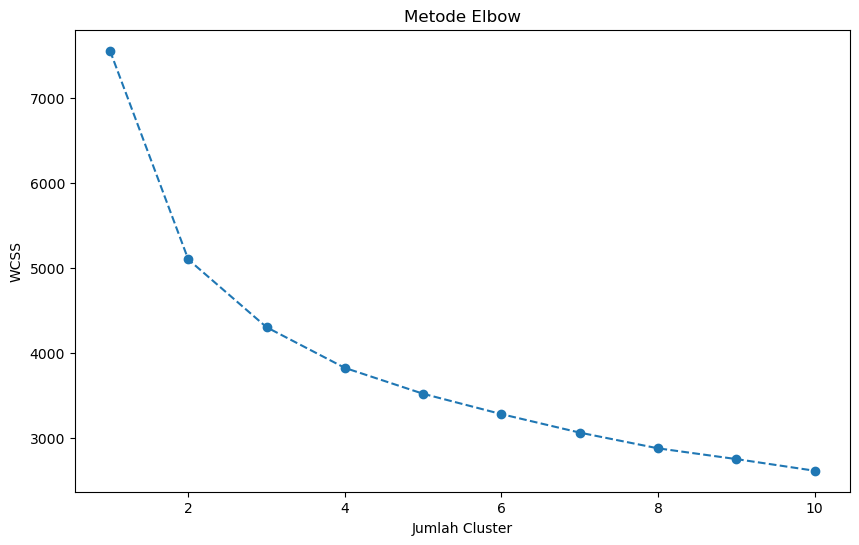


Hasil Clustering:
    Cluster  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
1         0                1                    1                  2   
3         0                2                    0                  4   
7         1                4                    0                  4   
10        0                1                    0                  2   
11        2                2                    0                  3   

    MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
1         11          1                6                2                 1   
3         11          4               20               10                 3   
7         76         10               56                3                 1   
10         5          5                6                0                 2   
11         6         16               11               11                 1   

    MntGoldProds  
1              6  
3              5  
7             23

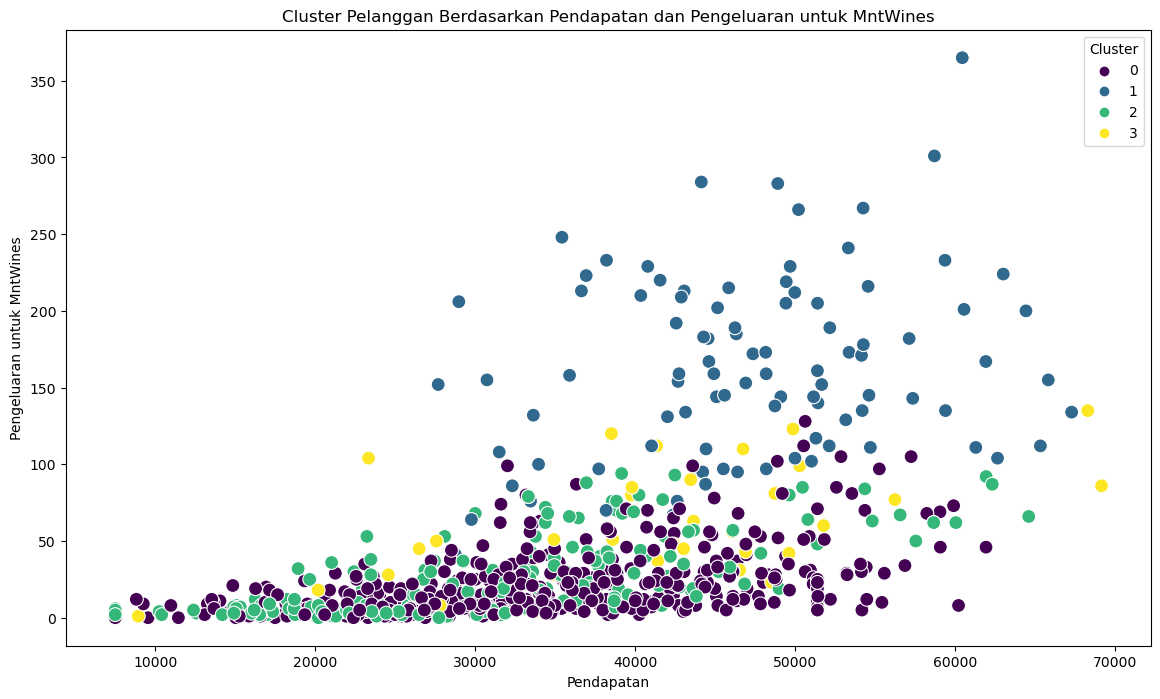

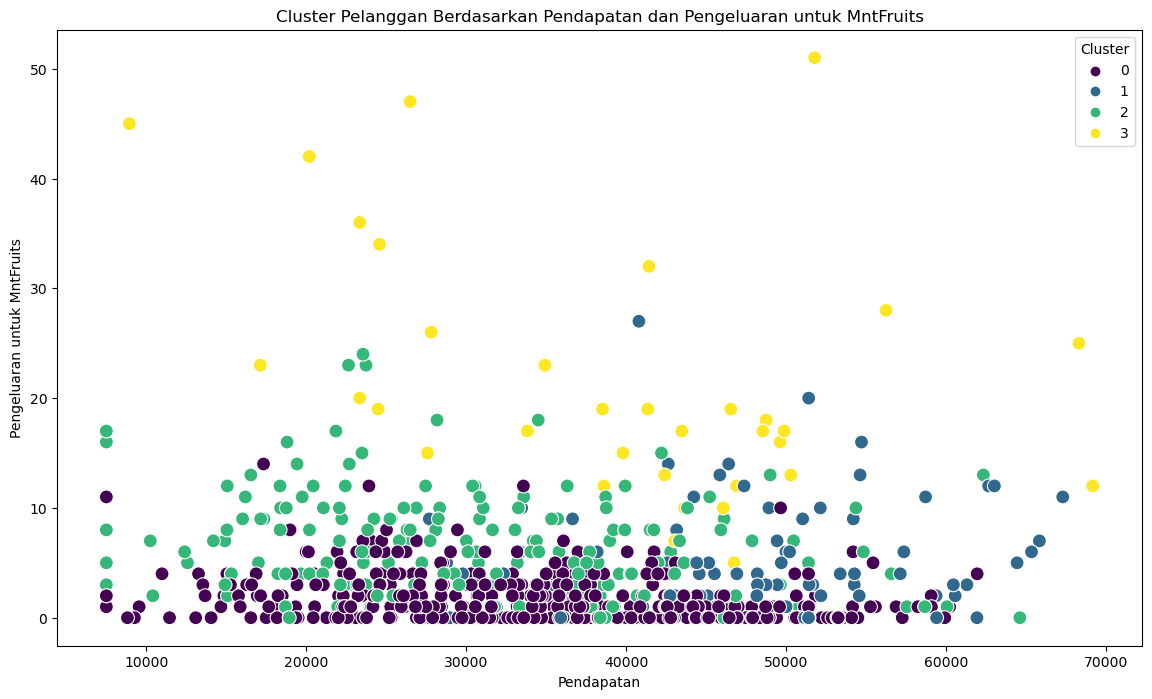

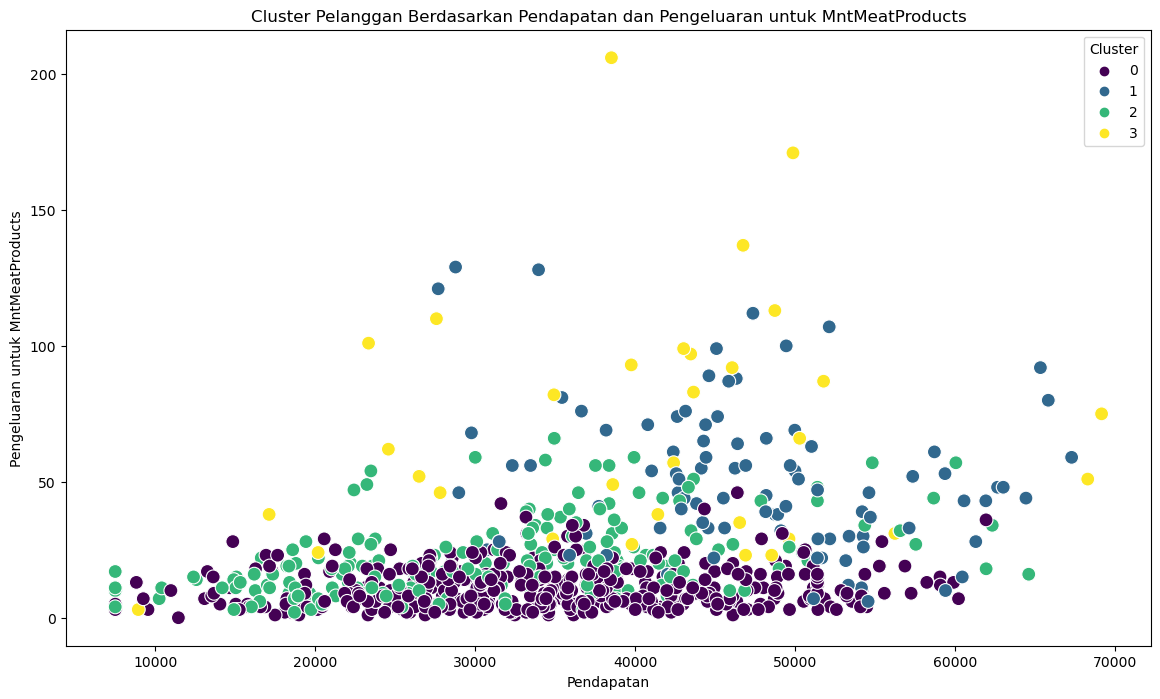

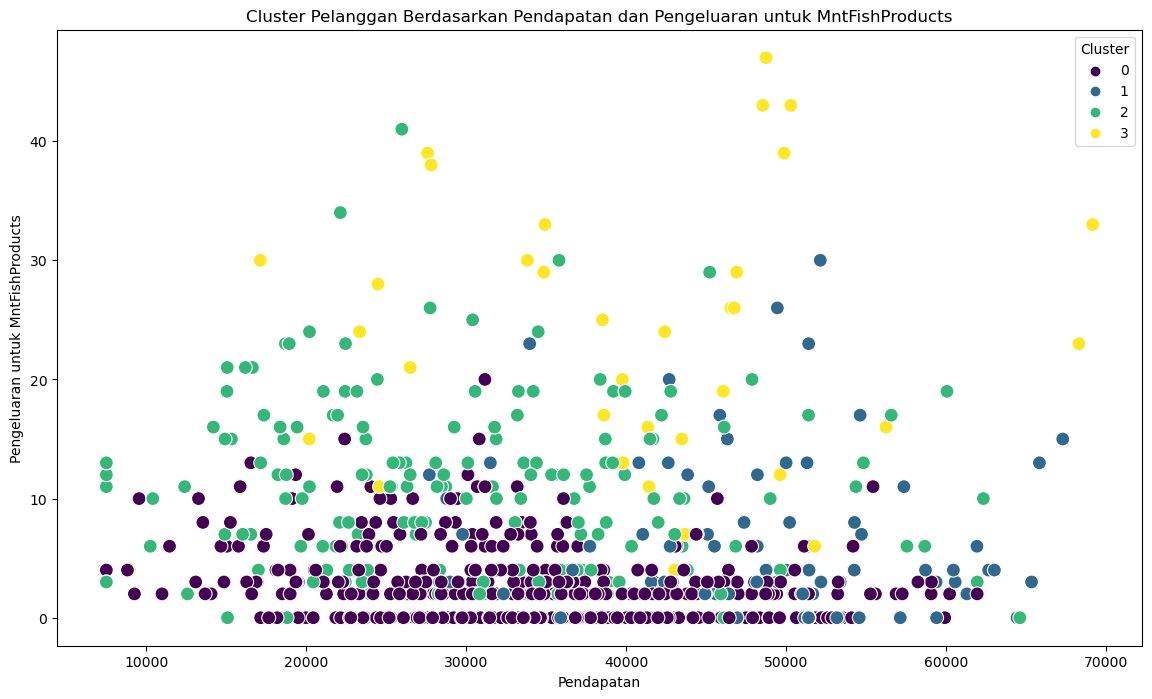

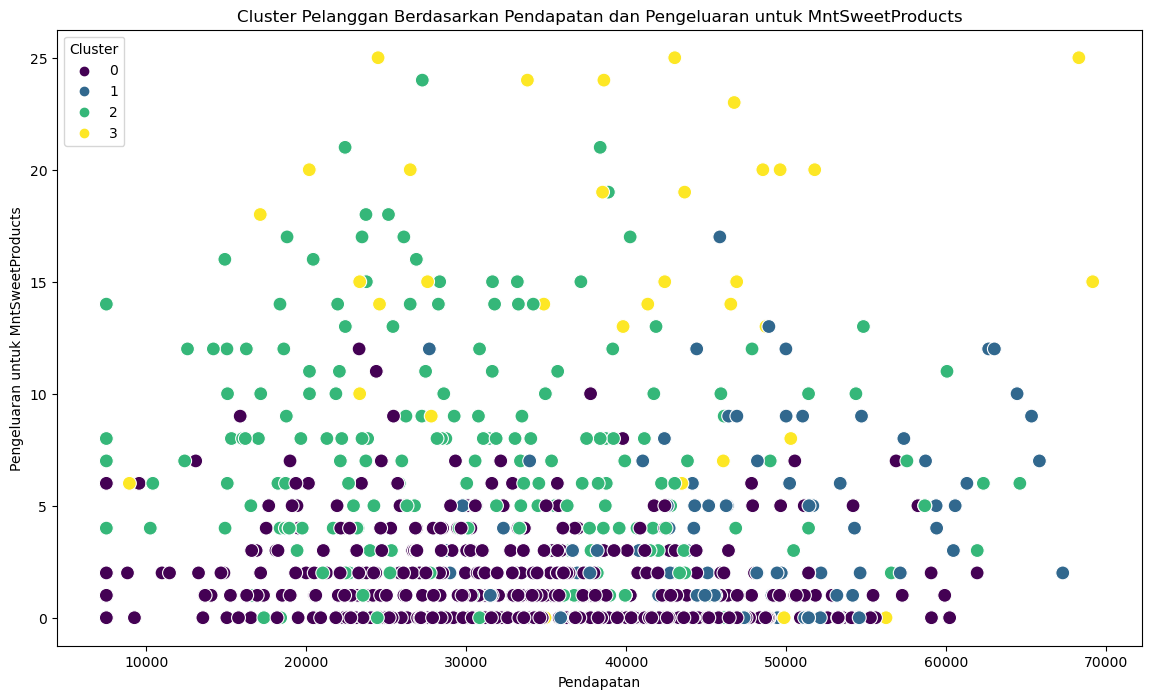

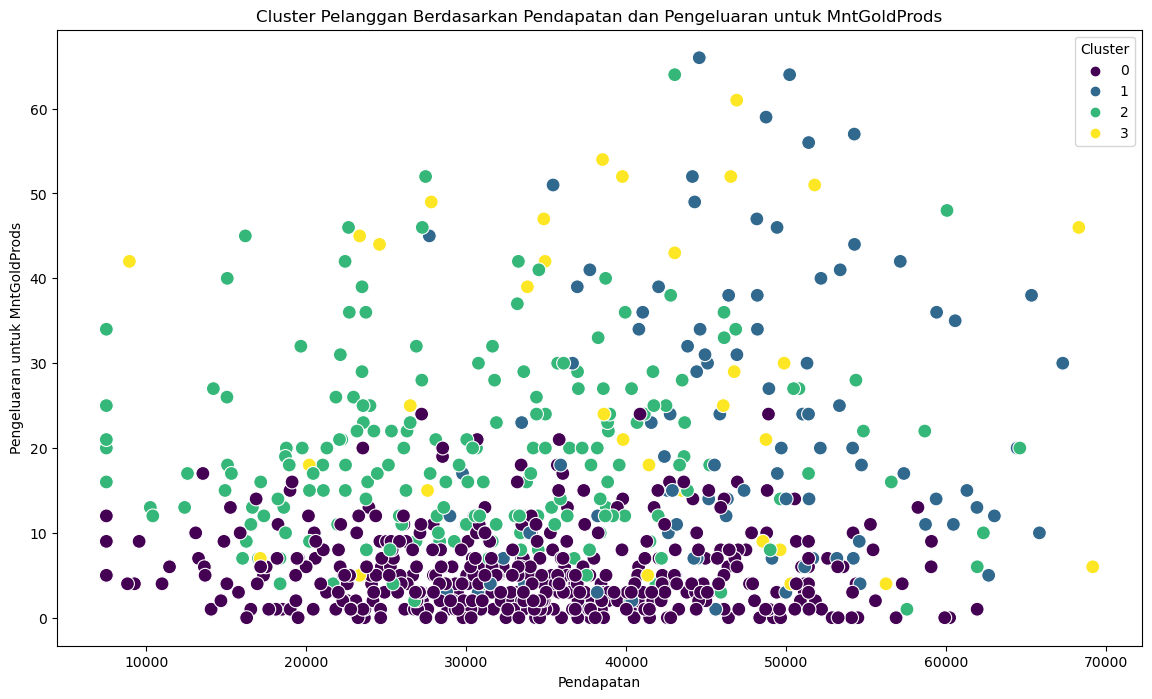

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Melakukan standardisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Menentukan jumlah cluster optimal menggunakan metode Elbow
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot WCSS untuk melihat Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster')
plt.ylabel('WCSS')
plt.show()

# Melakukan K-Means clustering dengan jumlah cluster optimal
optimal_clusters = 4  # Ganti dengan jumlah cluster optimal yang ditemukan
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Menampilkan hasil clustering
print("\nHasil Clustering:")
print(data[['Cluster'] + features].head())

# Visualisasi hasil clustering untuk semua kategori produk
product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

for product in product_columns:
    plt.figure(figsize=(14, 8))
    sns.scatterplot(data=data, x='Income', y=product, hue='Cluster', palette='viridis', s=100)
    plt.title(f'Cluster Pelanggan Berdasarkan Pendapatan dan Pengeluaran untuk {product}')
    plt.xlabel('Pendapatan')
    plt.ylabel(f'Pengeluaran untuk {product}')
    plt.legend(title='Cluster')
    plt.show()

### Insight dari Clustering

Berdasarkan analisis clustering menggunakan metode K-Means, beberapa insight penting telah diidentifikasi mengenai perilaku pembelian pelanggan. Insight ini dapat membantu supermarket dalam mengembangkan strategi pemasaran dan operasional yang lebih efektif.

#### Insight dari Clustering Berdasarkan Pendapatan dan Pengeluaran

1. **Pelanggan dengan Pendapatan Tinggi:**
   - Pelanggan dalam cluster ini cenderung mengeluarkan lebih banyak untuk produk premium seperti wine dan daging.
   - Mereka merupakan target yang ideal untuk penawaran produk mewah dan program loyalitas yang menawarkan keuntungan eksklusif.

2. **Pelanggan dengan Pendapatan Menengah:**
   - Pelanggan dalam cluster ini memiliki variasi pengeluaran yang lebih seimbang antara berbagai kategori produk.
   - Strategi pemasaran yang menawarkan diskon dan promosi pada berbagai produk dapat menarik perhatian mereka dan meningkatkan frekuensi pembelian.

3. **Pelanggan dengan Pendapatan Rendah:**
   - Pelanggan dalam cluster ini cenderung memiliki pengeluaran yang lebih terbatas dan fokus pada produk kebutuhan dasar.
   - Menawarkan produk dengan harga terjangkau dan promosi yang menarik dapat membantu dalam meningkatkan keterlibatan dan kepuasan pelanggan ini.

#### Insight dari Clustering Berdasarkan Frekuensi Pembelian

1. **Pelanggan yang Sering Berbelanja Online dan di Toko Fisik:**
   - Pelanggan dalam cluster ini menunjukkan preferensi yang kuat untuk berbelanja baik secara online maupun di toko fisik.
   - Mengoptimalkan pengalaman belanja di kedua saluran dengan penawaran khusus, program loyalitas, dan layanan pelanggan yang superior dapat meningkatkan loyalitas mereka.

2. **Pelanggan yang Sering Berbelanja Online:**
   - Pelanggan ini cenderung lebih nyaman berbelanja online dan mungkin mencari kemudahan dan efisiensi.
   - Menyediakan promosi eksklusif untuk pembelian online, pengiriman gratis, dan pengalaman belanja online yang mulus dapat menarik perhatian mereka.

3. **Pelanggan yang Sering Berbelanja di Toko Fisik:**
   - Pelanggan ini lebih suka pengalaman belanja langsung di toko fisik, mungkin karena mereka menikmati melihat dan merasakan produk secara langsung.
   - Meningkatkan pengalaman belanja di toko dengan layanan pelanggan yang ramah, penawaran khusus di toko, dan program loyalitas yang menarik dapat meningkatkan kepuasan dan frekuensi pembelian mereka.

### Rekomendasi Berdasarkan Insight Clustering

1. **Strategi Pemasaran Tersegmen:**
   - Menargetkan setiap cluster dengan kampanye pemasaran yang disesuaikan berdasarkan preferensi pengeluaran dan frekuensi pembelian mereka.
   - Pelanggan dengan pendapatan tinggi dapat ditargetkan dengan produk premium dan program loyalitas eksklusif.
   - Pelanggan dengan pendapatan menengah dan rendah dapat ditargetkan dengan promosi yang menarik dan produk dengan harga terjangkau.

2. **Pengembangan Program Loyalitas:**
   - Mengembangkan program loyalitas yang menawarkan keuntungan berbeda untuk setiap cluster, seperti diskon khusus, poin reward, dan penawaran eksklusif.
   - Mendorong pelanggan dengan frekuensi pembelian tinggi untuk tetap loyal dengan manfaat tambahan dan pengalaman belanja yang ditingkatkan.

3. **Optimalisasi Pengalaman Belanja:**
   - Meningkatkan pengalaman belanja online dengan antarmuka pengguna yang mudah digunakan, promosi eksklusif, dan pengiriman yang cepat dan gratis.
   - Meningkatkan pengalaman belanja di toko fisik dengan layanan pelanggan yang superior, penawaran khusus di toko, dan lingkungan belanja yang menyenangkan.

# Conclusions & Recommendations

## Conclusions

Berdasarkan analisis yang telah dilakukan, beberapa kesimpulan penting mengenai perilaku dan karakteristik pelanggan supermarket dapat diambil:

1. **Distribusi Usia Pelanggan:**
   - Mayoritas pelanggan berada dalam rentang usia dewasa dan paruh baya. Target pasar utama supermarket adalah pelanggan dalam rentang usia ini.

2. **Pengeluaran Berdasarkan Kategori Produk:**
   - Rata-rata pengeluaran terbesar ada pada kategori wine dan daging. Ini menunjukkan preferensi pelanggan yang lebih tinggi untuk produk-produk tersebut.

3. **Total Pengeluaran Berdasarkan Kelompok Usia:**
   - Kelompok usia paruh baya memiliki total pengeluaran tertinggi dibandingkan dengan kelompok usia lainnya, menjadikannya segmen pelanggan utama.

4. **Segmentasi Berdasarkan Pendapatan dan Pengeluaran:**
   - Pelanggan dengan pendapatan tinggi cenderung mengeluarkan lebih banyak untuk produk premium seperti wine dan daging.
   - Pelanggan dengan pendapatan rendah hingga menengah memiliki variasi pengeluaran yang lebih seimbang antara berbagai kategori produk.

5. **Segmentasi Berdasarkan Frekuensi Pembelian:**
   - Pelanggan yang sering melakukan pembelian online juga cenderung sering berbelanja di toko fisik, menunjukkan loyalitas yang tinggi.
   - Pola frekuensi pembelian menunjukkan preferensi yang kuat untuk saluran belanja tertentu.

## Recommendations

Berdasarkan kesimpulan yang telah diambil, berikut adalah beberapa rekomendasi strategis untuk meningkatkan loyalitas pelanggan dan pendapatan supermarket:

1. **Strategi Pemasaran Berdasarkan Usia dan Pengeluaran:**
   - Fokus pada pelanggan paruh baya dengan penawaran produk yang sering mereka beli seperti wine dan daging.
   - Sesuaikan kampanye pemasaran untuk pelanggan dengan pendapatan rendah hingga menengah dengan promosi yang menarik untuk berbagai produk.

2. **Program Loyalitas dan Retensi:**
   - Kembangkan program loyalitas yang menargetkan pelanggan yang sering berbelanja untuk memastikan mereka tetap berbelanja di supermarket.
   - Buat program retensi khusus untuk menarik kembali pelanggan yang jarang berbelanja dan meningkatkan frekuensi pembelian mereka.

3. **Penawaran Khusus dan Diskon:**
   - Tawarkan diskon dan penawaran khusus untuk produk dengan rata-rata pengeluaran tinggi seperti wine dan daging.
   - Diskon eksklusif untuk pelanggan yang memiliki nilai pembelian tinggi untuk mendorong mereka berbelanja lebih sering.

4. **Optimalisasi Pengalaman Belanja:**
   - Tingkatkan pengalaman belanja baik online maupun di toko fisik untuk pelanggan yang menunjukkan preferensi untuk kedua saluran tersebut.
   - Sediakan penawaran khusus dan layanan pelanggan yang superior untuk pelanggan yang sering berbelanja melalui saluran tersebut.

Dengan implementasi rekomendasi ini, supermarket dapat meningkatkan loyalitas pelanggan, meningkatkan frekuensi dan nilai pembelian, serta mengoptimalkan strategi pemasaran berdasarkan segmentasi yang lebih mendalam.